Loaded file A Classic Education - NightOwl.stem.mp4_stem0 from folder train with shape (7552000, 2) and sample rate 44100
Loaded file A Classic Education - NightOwl.stem.mp4_stem1 from folder train with shape (7552000, 2) and sample rate 44100
Loaded file A Classic Education - NightOwl.stem.mp4_stem2 from folder train with shape (7552000, 2) and sample rate 44100
Loaded file A Classic Education - NightOwl.stem.mp4_stem3 from folder train with shape (7552000, 2) and sample rate 44100
Loaded file A Classic Education - NightOwl.stem.mp4_stem4 from folder train with shape (7552000, 2) and sample rate 44100
Loaded file ANiMAL - Clinic A.stem.mp4_stem0 from folder train with shape (10489856, 2) and sample rate 44100
Loaded file ANiMAL - Clinic A.stem.mp4_stem1 from folder train with shape (10489856, 2) and sample rate 44100
Loaded file ANiMAL - Clinic A.stem.mp4_stem2 from folder train with shape (10489856, 2) and sample rate 44100
Loaded file ANiMAL - Clinic A.stem.mp4_stem3 from folder tra

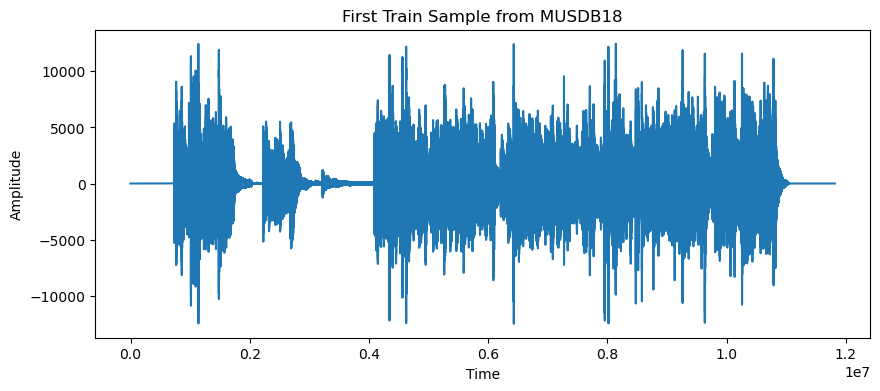

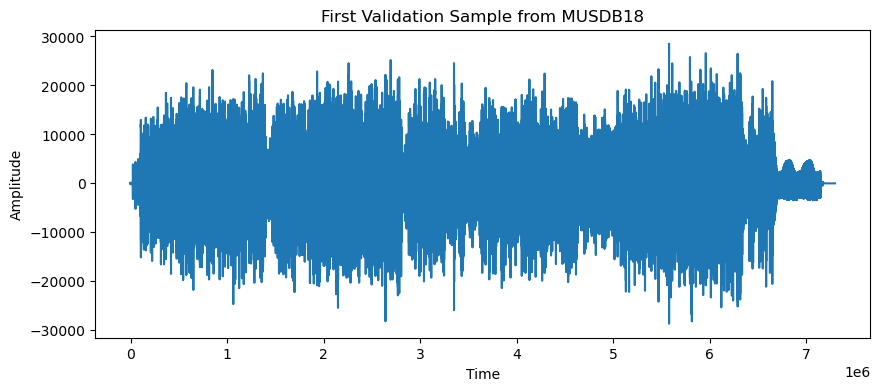

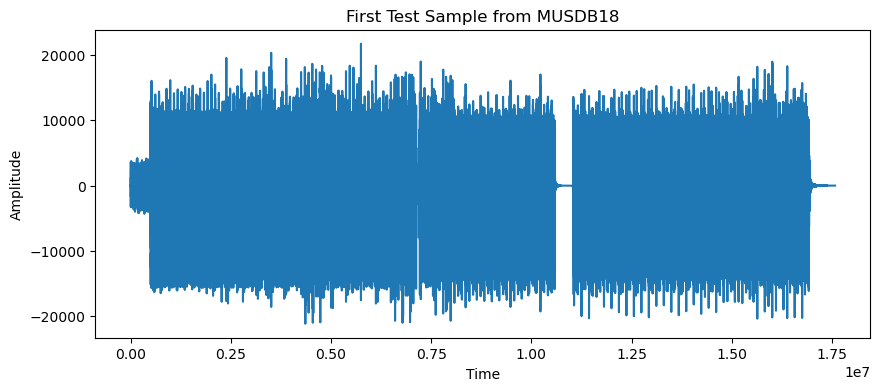

In [59]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the entire HDF5 file into memory
loaded_data = {}
input_h5_file_path = r'C:\Users\Son.Levi\SR_Audio_Transformer\musdb18_audio.h5'

with h5py.File(input_h5_file_path, 'r') as hf:
    for folder in hf.keys():
        folder_group = hf[folder]
        loaded_data[folder] = {}
        for file_name in folder_group.keys():
            file_group = folder_group[file_name]
            try:
                # Load the audio data
                audio_data = file_group['audio'][:]
                # Access the sample rate (if exists)
                sample_rate = file_group.attrs.get('sample_rate', 44100)  # Default to 44100 Hz if not found
                loaded_data[folder][file_name] = {
                    'audio': audio_data,
                    'sample_rate': sample_rate
                }
                print(f"Loaded file {file_name} from folder {folder} with shape {audio_data.shape} and sample rate {sample_rate}")
            except Exception as e:
                print(f"Error processing {file_name} in folder {folder}: {e}")

# Select 70 random samples from the loaded data
random_samples = []
random.seed(42)  # Set seed for reproducibility
all_files = [(folder, file_name) for folder in loaded_data for file_name in loaded_data[folder]]

selected_files = random.sample(all_files, min(100, len(all_files)))  # Randomly select 70 samples

for folder_name, file_name in selected_files:
    data = loaded_data[folder_name][file_name]
    try:
        # Extract the audio data and convert stereo to mono if needed
        audio_data = data['audio']
        audio_mono = np.mean(audio_data, axis=1)  # Combine stereo to mono
        random_samples.append(audio_mono)
    except Exception as e:
        print(f"Error processing {file_name} in {folder_name}: {e}")

print(f"Selected and processed {len(random_samples)} audio files from the MUSDB18 dataset.")

# Split into train, validation, and test sets
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Shuffle the samples again before splitting
random.shuffle(random_samples)

n_total = len(random_samples)
n_train = int(n_total * train_split)
n_val = int(n_total * val_split)

train_samples = random_samples[:n_train]
val_samples = random_samples[n_train:n_train + n_val]
test_samples = random_samples[n_train + n_val:]

print(f"Train samples: {len(train_samples)}, Validation samples: {len(val_samples)}, Test samples: {len(test_samples)}")

# Optional: Visualize the first randomly selected waveform from each set
if train_samples:
    plt.figure(figsize=(10, 4))
    plt.plot(train_samples[0])
    plt.title('First Train Sample from MUSDB18')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

if val_samples:
    plt.figure(figsize=(10, 4))
    plt.plot(val_samples[0])
    plt.title('First Validation Sample from MUSDB18')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

if test_samples:
    plt.figure(figsize=(10, 4))
    plt.plot(test_samples[0])
    plt.title('First Test Sample from MUSDB18')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()


In [14]:
import h5py
import numpy as np

def save_to_h5_with_min_max(audio_samples, output_h5_file_path):
    global_min = float('inf')
    global_max = float('-inf')

    with h5py.File(output_h5_file_path, 'w') as f:
        for i, audio in enumerate(audio_samples):
            grp = f.create_group(f'track_{i}')

            # Save the audio data
            grp.create_dataset('audio', data=audio)

            # Calculate min and max
            min_val = np.min(audio)
            max_val = np.max(audio)

            if min_val < global_min:
                global_min = min_val
            if max_val > global_max:
                global_max = max_val

    return global_min, global_max

# Example usage for train, val, and test samples
train_min, train_max = save_to_h5_with_min_max(train_samples, 'train_data.h5')
val_min, val_max = save_to_h5_with_min_max(val_samples, 'val_data.h5')
test_min, test_max = save_to_h5_with_min_max(test_samples, 'test_data.h5')

# Find global min and max across all datasets
global_min = min(train_min, val_min, test_min)
global_max = max(train_max, val_max, test_max)

print(f"Global Min: {global_min}, Global Max: {global_max}")


Global Min: -32319.5, Global Max: 32716.5


Chunk 0 from Track 7 is silent, skipping...
Chunk 0 from Track 9 is silent, skipping...
Chunk 1 from Track 9 is silent, skipping...
Chunk 2 from Track 9 is silent, skipping...
Chunk 0 from Track 10 is silent, skipping...
Chunk 0 from Track 17 is silent, skipping...
Chunk 0 from Track 34 is silent, skipping...
Chunk 9 from Track 34 is silent, skipping...
Chunk 0 from Track 40 is silent, skipping...
Chunk 10 from Track 44 is silent, skipping...
Chunk 11 from Track 44 is silent, skipping...
Chunk 12 from Track 44 is silent, skipping...
Chunk 13 from Track 44 is silent, skipping...
Chunk 14 from Track 44 is silent, skipping...
Chunk 15 from Track 44 is silent, skipping...
Chunk 0 from Track 56 is silent, skipping...
Chunk 1 from Track 56 is silent, skipping...
Chunk 8 from Track 62 is silent, skipping...
Chunk 9 from Track 62 is silent, skipping...
Chunk 12 from Track 62 is silent, skipping...
Chunk 13 from Track 62 is silent, skipping...
Chunk 14 from Track 62 is silent, skipping...
Chunk

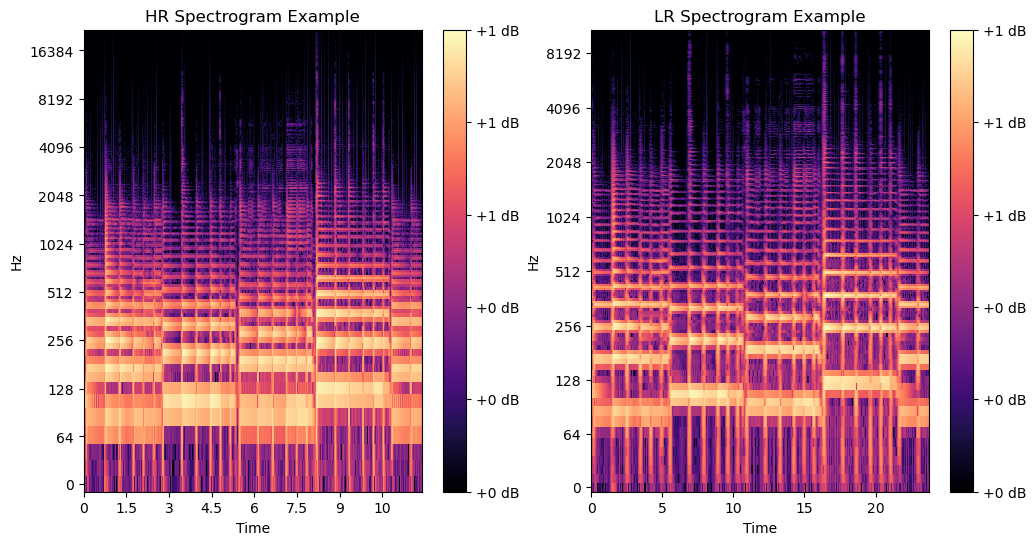

In [3]:
import librosa
import librosa.display
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

unction to generate a 1024x1024 # Fspectrogram with dynamic hop length calculation
def generate_1024x1024_spectrogram(audio, sr=44100):
    n_fft = 4096  # Higher frequency resolution
    win_length = 4096
    hop_length = int(len(audio) / ((1024 - 1) * 2))  # Adjust hop length to fit the width

    # Compute the Short-Time Fourier Transform (STFT)
    D = librosa.stft(np.asarray(audio), n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=signal.windows.hamming(win_length))
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Normalize the dB spectrogram to [0, 1]
    S_db_normalized = (S_db - S_db.min()) / (S_db.max() - S_db.min())

    # Initialize a zero matrix of size 1024x1024
    S_db_resized = np.zeros((1024, 1024), dtype=S_db_normalized.dtype)

    # Get the size of the current spectrogram
    h, w = S_db_normalized.shape

    # Determine the size to copy
    h_copy = min(h, 1024)
    w_copy = min(w, 1024)

    # Copy the content to the resized spectrogram
    S_db_resized[:h_copy, :w_copy] = S_db_normalized[:h_copy, :w_copy]

    return S_db_resized, n_fft, hop_length

# Function to check if a chunk is silent
def is_silent(audio_chunk, threshold=-70):
    rms = np.sqrt(np.mean(np.square(audio_chunk)))
    rms_db = 20 * np.log10(rms) if rms > 0 else -80
    return rms_db < threshold

# Function to remove empty spectrograms from the lists
def remove_empty_spectrograms(hr_spectrograms, lr_spectrograms):
    hr_spectrograms_filtered = []
    lr_spectrograms_filtered = []

    for hr_spectrogram, lr_spectrogram in zip(hr_spectrograms, lr_spectrograms):
        # Check if either HR or LR spectrogram is all zeros
        if not np.all(hr_spectrogram == 0) and not np.all(lr_spectrogram == 0):
            hr_spectrograms_filtered.append(hr_spectrogram)
            lr_spectrograms_filtered.append(lr_spectrogram)

    print(f"Removed {len(hr_spectrograms) - len(hr_spectrograms_filtered)} empty spectrogram pairs.")
    print(f"Remaining HR spectrograms: {len(hr_spectrograms_filtered)}, LR spectrograms: {len(lr_spectrograms_filtered)}")

    return hr_spectrograms_filtered, lr_spectrograms_filtered

# Parameters
segment_length = 25  # in seconds
sr_original = 44100
sr_low_res = 22050

def save_spectrograms_to_h5(audio_samples, output_h5_file_path):
    # Initialize lists to store spectrograms
    hr_spectrograms = []
    lr_spectrograms = []

    with h5py.File(output_h5_file_path, 'w') as f:
        for i, audio in enumerate(audio_samples):
            total_length = len(audio) / sr_original
            num_chunks = int(total_length // segment_length)

            for chunk_idx in range(num_chunks):
                start_sample = int(chunk_idx * segment_length * sr_original)
                end_sample = int(start_sample + segment_length * sr_original)
                chunk_audio = audio[start_sample:end_sample]

                if is_silent(chunk_audio):
                    print(f"Chunk {chunk_idx} from Track {i} is silent, skipping...")
                    continue

                # Generate HR spectrogram
                hr_spectrogram, n_fft_hr, hop_length_hr = generate_1024x1024_spectrogram(
                    chunk_audio, sr=sr_original)
                
                # Downsample and generate LR spectrogram
                lr_audio = librosa.resample(chunk_audio, orig_sr=sr_original, target_sr=sr_low_res)
                lr_spectrogram, n_fft_lr, hop_length_lr = generate_1024x1024_spectrogram(
                    lr_audio, sr=sr_low_res)

                # Save to HDF5
                chunk_name = f'track_{i}_chunk_{chunk_idx}'
                grp = f.create_group(chunk_name)
                grp.create_dataset('hr_spectrogram', data=hr_spectrogram, chunks=(1024, 1024), dtype='float16', compression='gzip')
                grp.create_dataset('lr_spectrogram', data=lr_spectrogram, chunks=(1024, 1024), dtype='float16', compression='gzip')

                grp.attrs['n_fft_hr'] = n_fft_hr
                grp.attrs['hop_length_hr'] = hop_length_hr
                grp.attrs['n_fft_lr'] = n_fft_lr
                grp.attrs['hop_length_lr'] = hop_length_lr

                # Append spectrograms to the lists
                hr_spectrograms.append(hr_spectrogram)
                lr_spectrograms.append(lr_spectrogram)

    # Remove empty spectrograms
    hr_spectrograms, lr_spectrograms = remove_empty_spectrograms(hr_spectrograms, lr_spectrograms)

    return hr_spectrograms, lr_spectrograms

# Splitting the samples into train, validation, and test sets
train_samples = random_samples[:n_train]
val_samples = random_samples[n_train:n_train + n_val]
test_samples = random_samples[n_train + n_val:]

# Save the train set
output_train_h5_file_path = r'C:\Users\Son.Levi\SR_Audio_Transformer\musdb18_sr_spectrograms_1024x1024_with_params_train_100_2.h5'
train_hr_spectrograms, train_lr_spectrograms = save_spectrograms_to_h5(train_samples, output_train_h5_file_path)

# Save the validation set
output_val_h5_file_path = r'C:\Users\Son.Levi\SR_Audio_Transformer\musdb18_sr_spectrograms_1024x1024_with_params_val_2.h5'
val_hr_spectrograms, val_lr_spectrograms = save_spectrograms_to_h5(val_samples, output_val_h5_file_path)

# Save the test set
output_test_h5_file_path = r'C:\Users\Son.Levi\SR_Audio_Transformer\musdb18_sr_spectrograms_1024x1024_with_params_test_2.h5'
test_hr_spectrograms, test_lr_spectrograms = save_spectrograms_to_h5(test_samples, output_test_h5_file_path)

print(f"HR and LR spectrograms have been saved to the following files:")
print(f"Train: {output_train_h5_file_path}")
print(f"Validation: {output_val_h5_file_path}")
print(f"Test: {output_test_h5_file_path}")

# Optional: Visualize one HR and LR spectrogram if available
if train_hr_spectrograms:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("HR Spectrogram Example")
    librosa.display.specshow(train_hr_spectrograms[0], sr=sr_original, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(1, 2, 2)
    plt.title("LR Spectrogram Example")
    librosa.display.specshow(train_lr_spectrograms[0], sr=sr_low_res, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')

    plt.show()


In [4]:
train_hr_spectrograms[0]

array([[0.57111327, 0.55021787, 0.42634156, ..., 0.213664  , 0.39526086,
        0.41938676],
       [0.61555368, 0.56856444, 0.47237936, ..., 0.40759341, 0.42979254,
        0.46526466],
       [0.65458851, 0.6355701 , 0.58836904, ..., 0.37370481, 0.396701  ,
        0.33076537],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

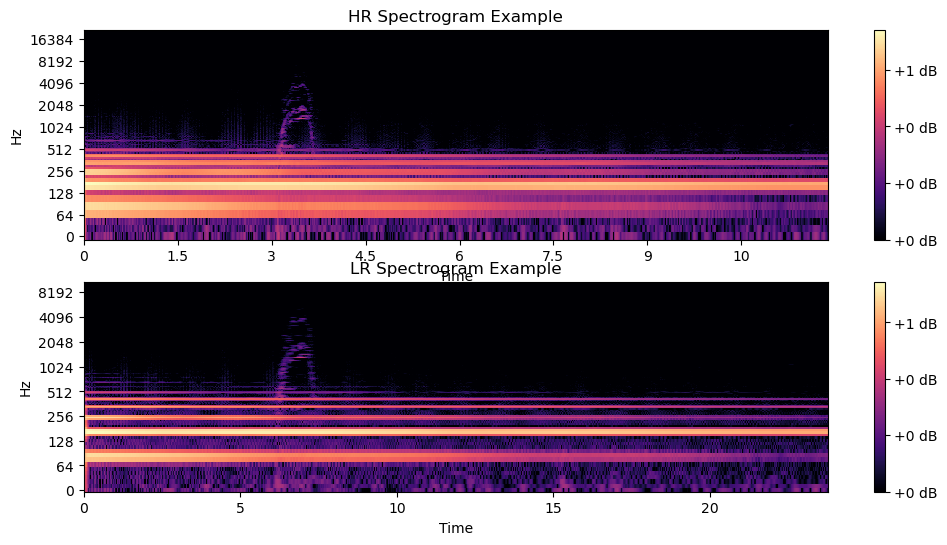

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("HR Spectrogram Example")
librosa.display.specshow(train_hr_spectrograms[2], sr=sr_original, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
plt.title("LR Spectrogram Example")
librosa.display.specshow(train_lr_spectrograms[2], sr=sr_low_res, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.show()


In [7]:
import os
os.chdir("C:/Users/Son.Levi/Audio-Super-Resolution-ViT/ViT-SR/Autoencoder")

In [8]:
import torch
from models import GenerativeNetwork

# Initialize the model
model = GenerativeNetwork(device='cpu')

# Set the model to training mode (default is training mode, so this line is optional)
model.train()

print("Model initialized successfully. Ready for training from scratch.")


C:\Users\Son.Levi\AppData\Local\anaconda3\envs\audio-super-resolution\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model initialized successfully. Ready for training from scratch.


Starting Epoch 1/25...
Epoch [1/25] completed. Train Loss: 0.0596, Val Loss: 0.0467, Time: 3231.67 sec


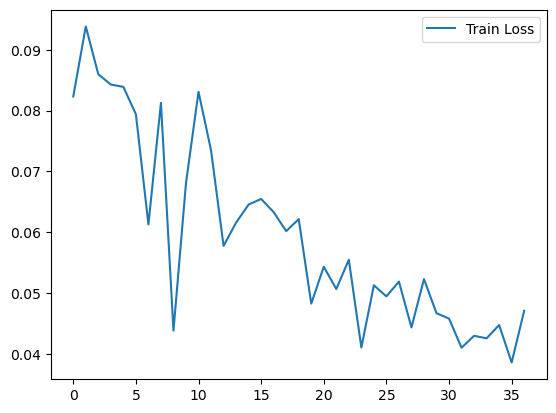

Starting Epoch 2/25...
Epoch [2/25] completed. Train Loss: 0.0426, Val Loss: 0.0500, Time: 2970.51 sec


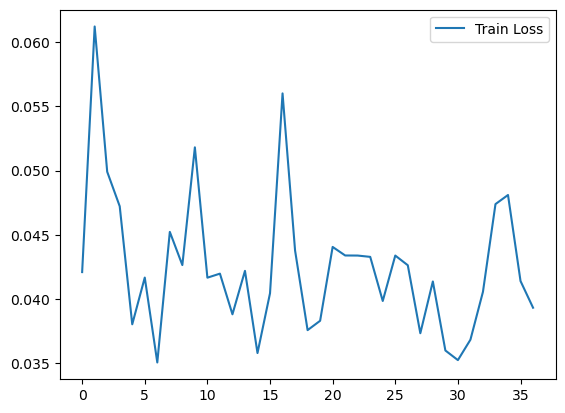

Starting Epoch 3/25...
Epoch [3/25] completed. Train Loss: 0.0426, Val Loss: 0.0492, Time: 2892.15 sec


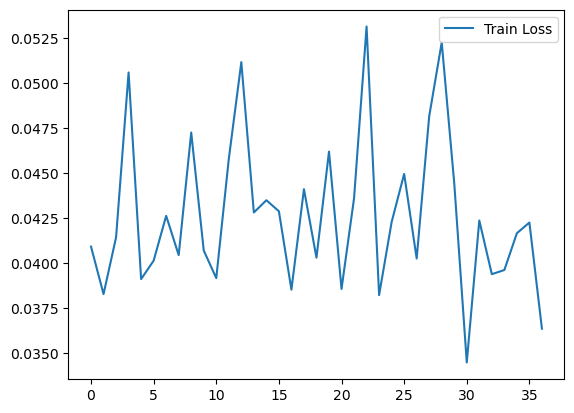

Starting Epoch 4/25...
Epoch [4/25] completed. Train Loss: 0.0427, Val Loss: 0.0493, Time: 3121.82 sec


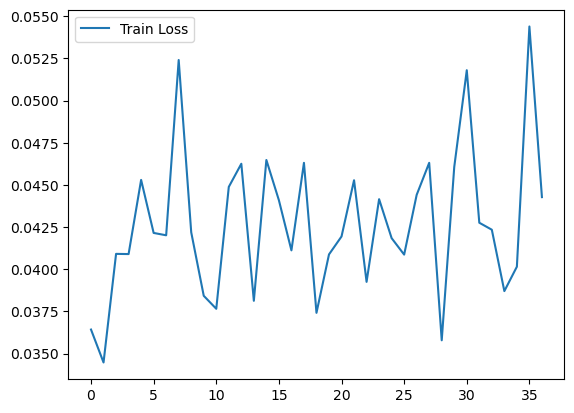

Starting Epoch 5/25...
Epoch [5/25] completed. Train Loss: 0.0425, Val Loss: 0.0488, Time: 3020.61 sec


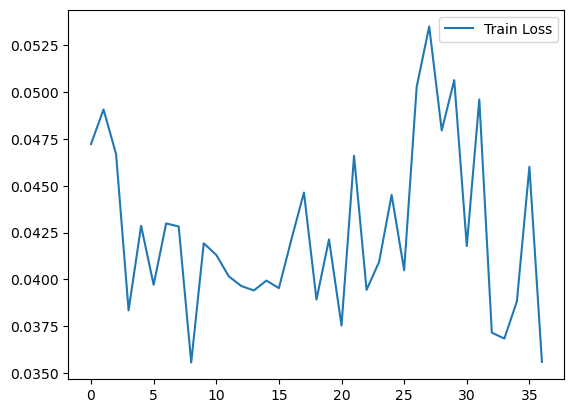

Starting Epoch 6/25...
Epoch [6/25] completed. Train Loss: 0.0425, Val Loss: 0.0496, Time: 2991.01 sec


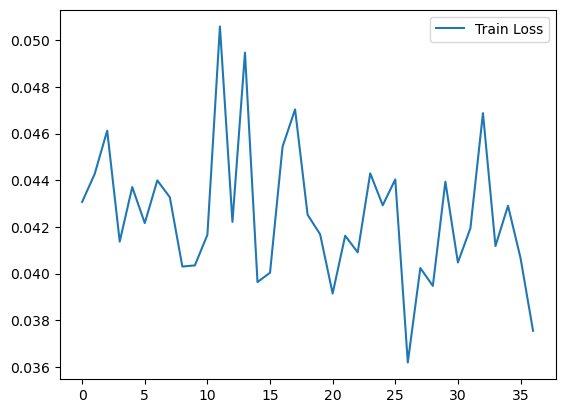

Starting Epoch 7/25...
Epoch [7/25] completed. Train Loss: 0.0426, Val Loss: 0.0486, Time: 2924.95 sec


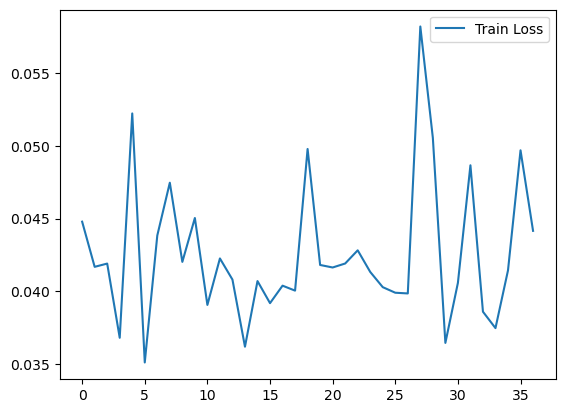

Starting Epoch 8/25...
Epoch [8/25] completed. Train Loss: 0.0425, Val Loss: 0.0478, Time: 2824.64 sec


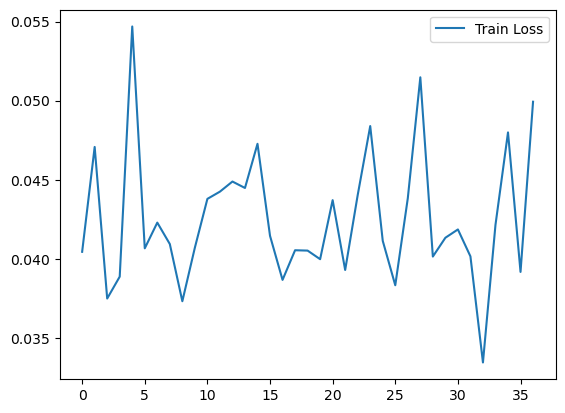

Starting Epoch 9/25...
Epoch [9/25] completed. Train Loss: 0.0411, Val Loss: 0.0453, Time: 2824.47 sec


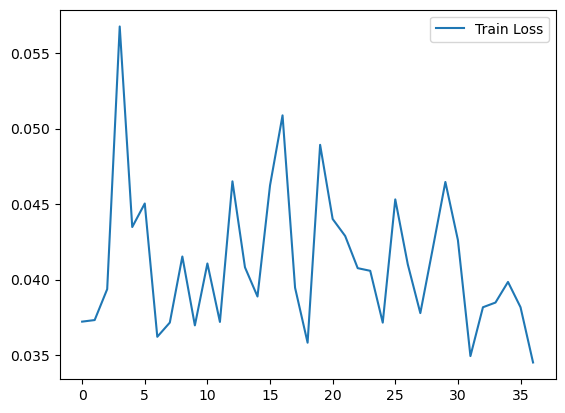

Starting Epoch 10/25...
Epoch [10/25] completed. Train Loss: 0.0389, Val Loss: 0.0405, Time: 2843.49 sec
Model saved at epoch 10


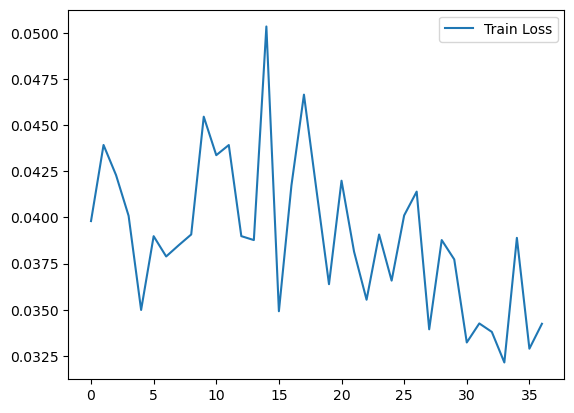

Starting Epoch 11/25...
Epoch [11/25] completed. Train Loss: 0.0319, Val Loss: 0.0285, Time: 2832.73 sec


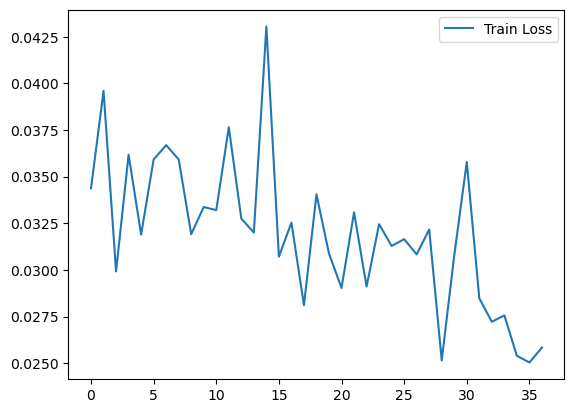

Starting Epoch 12/25...
Epoch [12/25] completed. Train Loss: 0.0220, Val Loss: 0.0193, Time: 2847.86 sec


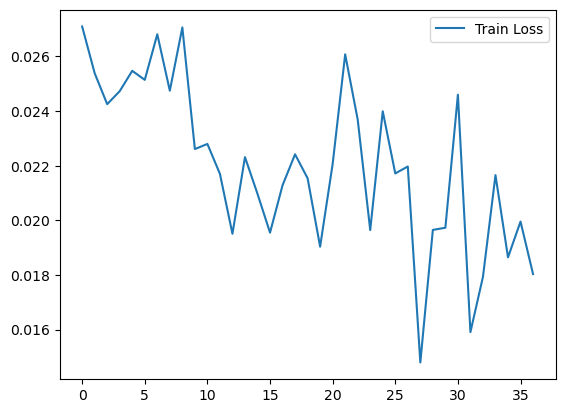

Starting Epoch 13/25...
Epoch [13/25] completed. Train Loss: 0.0181, Val Loss: 0.0162, Time: 2843.74 sec


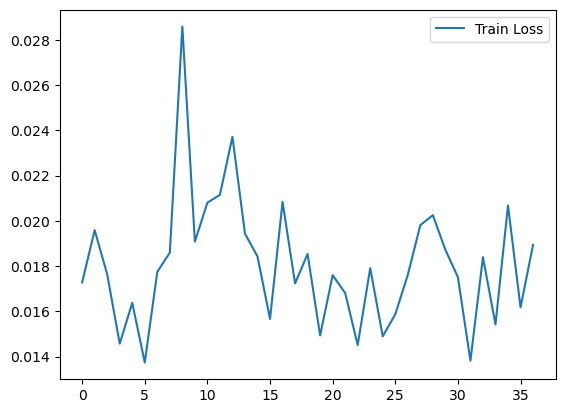

Starting Epoch 14/25...
Epoch [14/25] completed. Train Loss: 0.0156, Val Loss: 0.0141, Time: 2848.88 sec


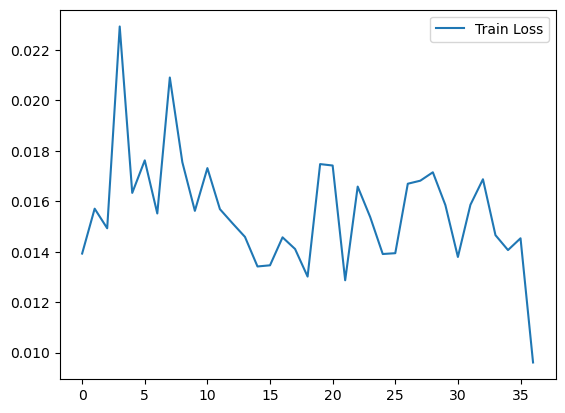

Starting Epoch 15/25...
Epoch [15/25] completed. Train Loss: 0.0147, Val Loss: 0.0131, Time: 2888.23 sec


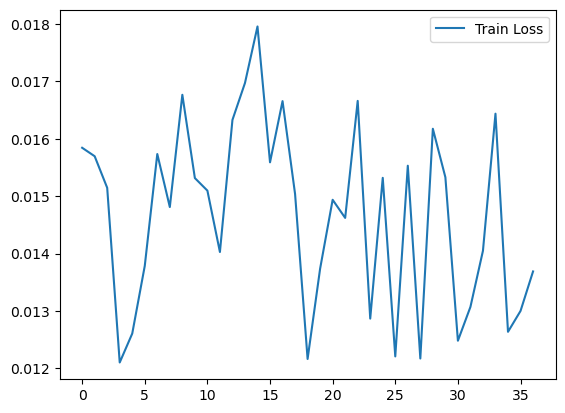

Starting Epoch 16/25...
Epoch [16/25] completed. Train Loss: 0.0138, Val Loss: 0.0124, Time: 2871.55 sec


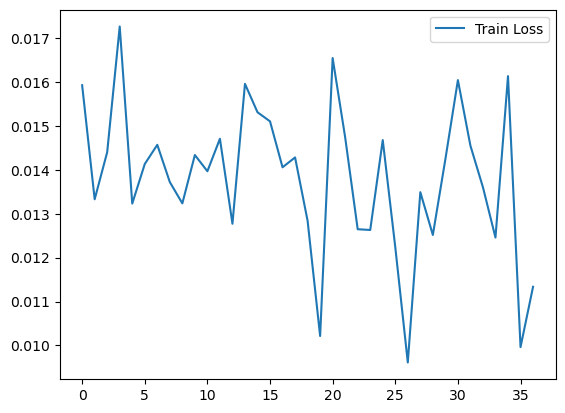

Starting Epoch 17/25...
Epoch [17/25] completed. Train Loss: 0.0135, Val Loss: 0.0126, Time: 2915.48 sec


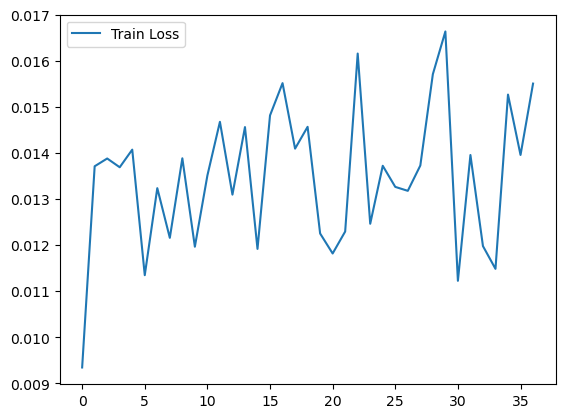

Starting Epoch 18/25...
Epoch [18/25] completed. Train Loss: 0.0130, Val Loss: 0.0116, Time: 2918.73 sec


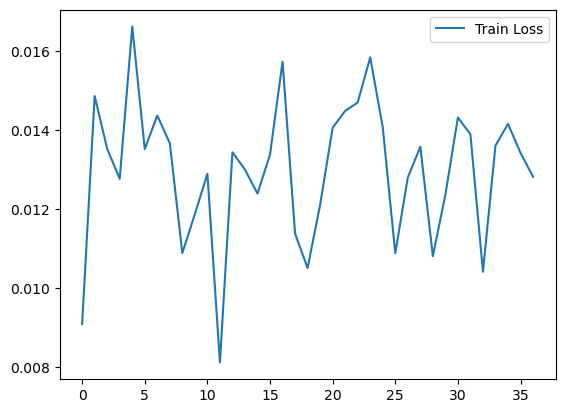

Starting Epoch 19/25...
Epoch [19/25] completed. Train Loss: 0.0126, Val Loss: 0.0127, Time: 2895.79 sec


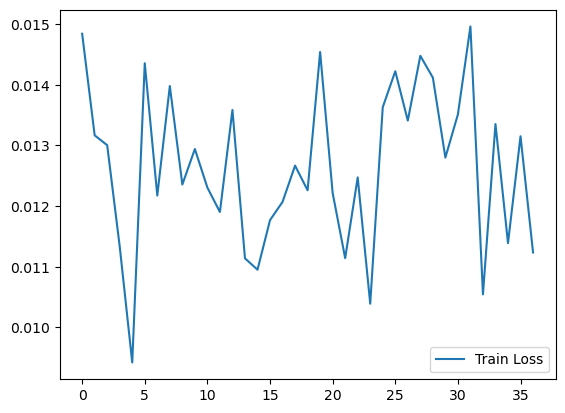

Starting Epoch 20/25...
Epoch [20/25] completed. Train Loss: 0.0131, Val Loss: 0.0115, Time: 2941.17 sec
Model saved at epoch 20


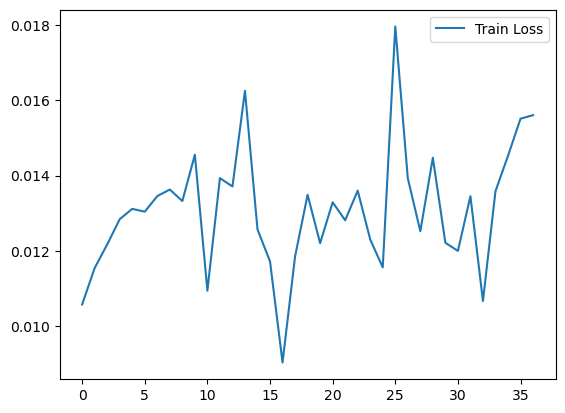

Starting Epoch 21/25...
Epoch [21/25] completed. Train Loss: 0.0124, Val Loss: 0.0116, Time: 2980.05 sec


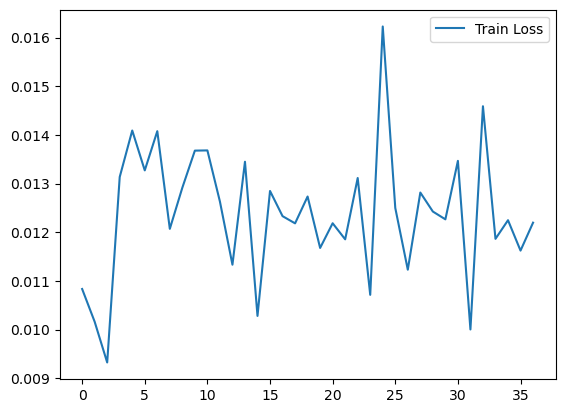

Starting Epoch 22/25...
Epoch [22/25] completed. Train Loss: 0.0119, Val Loss: 0.0113, Time: 2942.57 sec


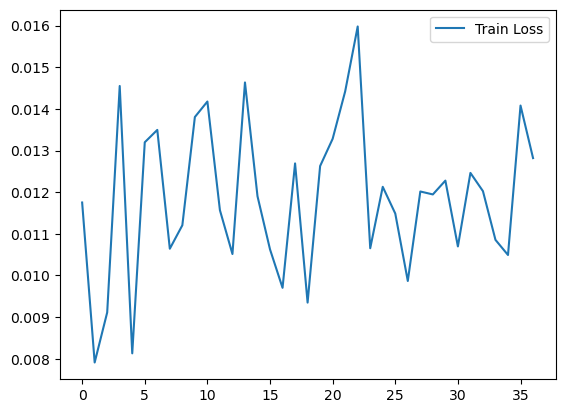

Starting Epoch 23/25...
Epoch [23/25] completed. Train Loss: 0.0114, Val Loss: 0.0111, Time: 2997.26 sec


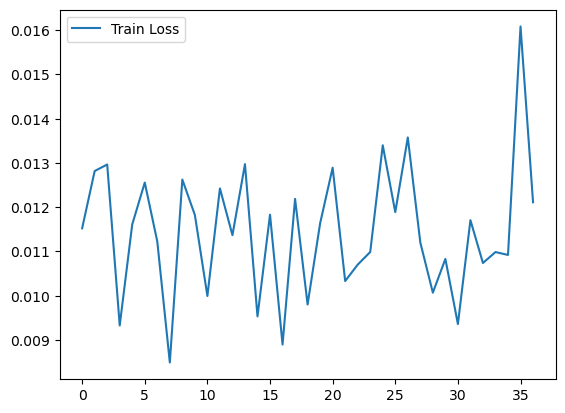

Starting Epoch 24/25...
Epoch [24/25] completed. Train Loss: 0.0114, Val Loss: 0.0119, Time: 2939.81 sec


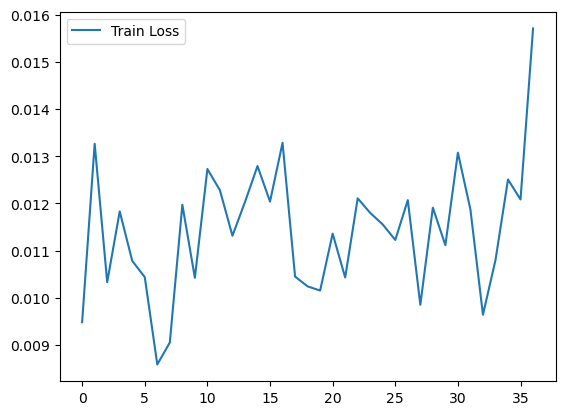

Starting Epoch 25/25...
Epoch [25/25] completed. Train Loss: 0.0115, Val Loss: 0.0113, Time: 2922.48 sec


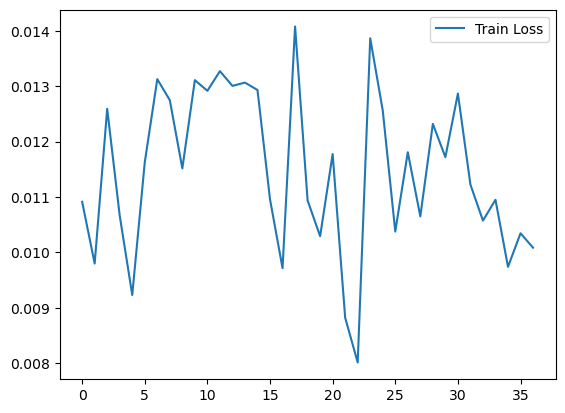

Training completed successfully.
Starting testing...
Test completed. Test Loss: 0.0127


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import h5py
import matplotlib.pyplot as plt
from models import GenerativeNetwork  # Assuming you have this model class
import time

# Custom Dataset to Load Precomputed Spectrograms
class H5Dataset(Dataset):
    def __init__(self, h5_file_path):
        self.h5_file = h5py.File(h5_file_path, 'r')
        self.keys = list(self.h5_file.keys())

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, idx):
        key = self.keys[idx]
        hr_spectrogram = self.h5_file[key]['hr_spectrogram'][:]
        lr_spectrogram = self.h5_file[key]['lr_spectrogram'][:]

        # Add a channel dimension
        hr_spectrogram = torch.tensor(hr_spectrogram, dtype=torch.float32).unsqueeze(0)
        lr_spectrogram = torch.tensor(lr_spectrogram, dtype=torch.float32).unsqueeze(0)

        return lr_spectrogram, hr_spectrogram

# Paths to your HDF5 files
train_h5_path = r'C:\Users\Son.Levi\SR_Audio_Transformer\musdb18_sr_spectrograms_1024x1024_with_params_train_100_2.h5'
val_h5_path = r'C:\Users\Son.Levi\SR_Audio_Transformer\musdb18_sr_spectrograms_1024x1024_with_params_val_2.h5'
test_h5_path = r'C:\Users\Son.Levi\SR_Audio_Transformer\musdb18_sr_spectrograms_1024x1024_with_params_test_2.h5'

# Create DataLoader for train, validation, and test sets
train_dataset = H5Dataset(train_h5_path)
val_dataset = H5Dataset(val_h5_path)
test_dataset = H5Dataset(test_h5_path)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
model = GenerativeNetwork(device='cpu')

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer_gen = optim.Adam(model.parameters(), lr=0.001)

# Move model to device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training function
def train(generator, epochs, train_loader, val_loader):
    for epoch in range(epochs):
        print(f"Starting Epoch {epoch + 1}/{epochs}...")

        start_time = time.time()
        generator.train()
        total_loss = 0
        history = []

        for batch_lb, batch_hb in train_loader:
            batch_lb, batch_hb = batch_lb.to(device), batch_hb.to(device)

            # Forward pass
            gen_hb = generator(batch_lb)
            loss = criterion(gen_hb, batch_hb)

            # Backward pass and optimization
            optimizer_gen.zero_grad()
            loss.backward()
            optimizer_gen.step()

            total_loss += loss.item()
            history.append(loss.item())

        # Average loss
        avg_train_loss = total_loss / len(train_loader)

        # Validation
        generator.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_lb, val_hb in val_loader:
                val_lb, val_hb = val_lb.to(device), val_hb.to(device)
                gen_val_hb = generator(val_lb)
                loss = criterion(gen_val_hb, val_hb)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)

        # Epoch time
        end_time = time.time()
        epoch_duration = end_time - start_time

        # Print loss and time
        print(f'Epoch [{epoch + 1}/{epochs}] completed. Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Time: {epoch_duration:.2f} sec')

        # Save model periodically
        if (epoch + 1) % 10 == 0:
            torch.save(generator.state_dict(), f"generator_epoch_{epoch + 1}.pth")
            print(f"Model saved at epoch {epoch + 1}")

        # Plot the loss
        plt.plot(history, label="Train Loss")
        plt.legend()
        plt.show()

    print("Training completed successfully.")

# Testing function
def test(generator, test_loader):
    print("Starting testing...")
    generator.eval()
    test_loss = 0.0
    with torch.no_grad():
        for test_lb, test_hb in test_loader:
            test_lb, test_hb = test_lb.to(device), test_hb.to(device)
            gen_test_hb = generator(test_lb)
            loss = criterion(gen_test_hb, test_hb)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    print(f'Test completed. Test Loss: {avg_test_loss:.4f}')

# Training the model
train(model, epochs=25, train_loader=train_loader, val_loader=val_loader)

# Testing the model
test(model, test_loader)


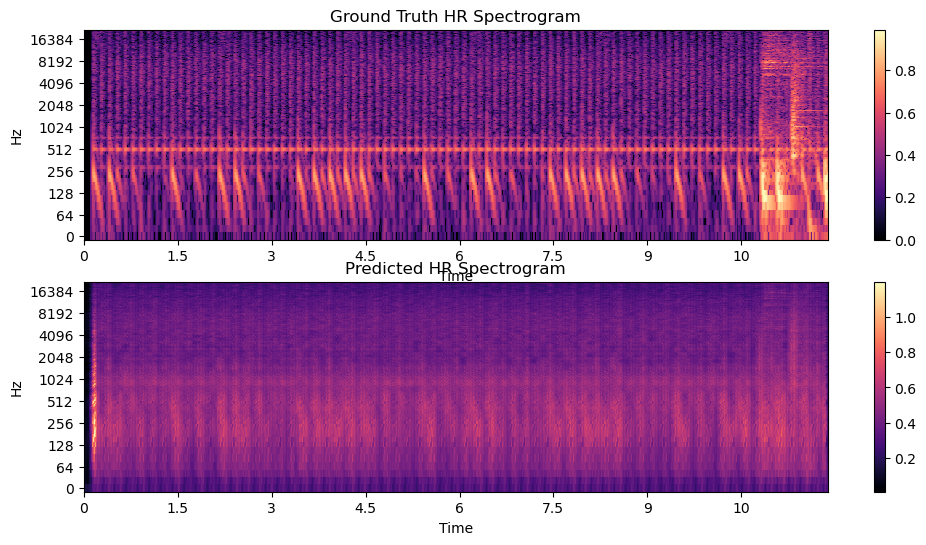

In [56]:
import matplotlib.pyplot as plt
import librosa.display

lr_spectrogram, hr_spectrogram = next(iter(test_loader))
lr_spectrogram = lr_spectrogram.to(device)

with torch.no_grad():
    predicted_hr_spectrogram = model(lr_spectrogram)

plt.figure(figsize=(12, 6))

# Plot Ground Truth HR
plt.subplot(2, 1, 1)
plt.title("Ground Truth HR Spectrogram")
librosa.display.specshow(hr_spectrogram[0].cpu().numpy().squeeze(), sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

# Plot Predicted HR
plt.subplot(2, 1, 2)
plt.title("Predicted HR Spectrogram")
librosa.display.specshow(predicted_hr_spectrogram[0].cpu().numpy().squeeze(), sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

plt.show()


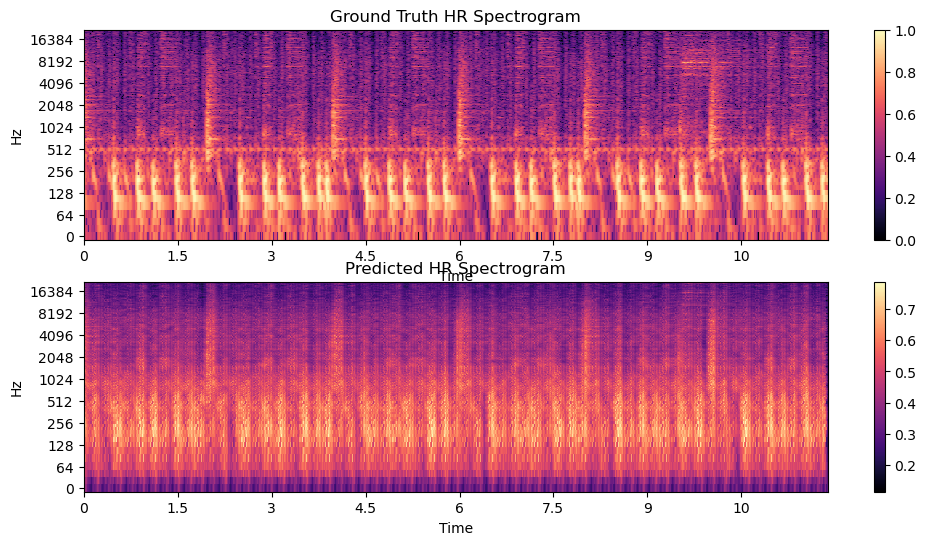

In [57]:
import matplotlib.pyplot as plt
import librosa.display

lr_spectrogram, hr_spectrogram = next(iter(test_loader))
lr_spectrogram = lr_spectrogram.to(device)

with torch.no_grad():
    predicted_hr_spectrogram = model(lr_spectrogram)

plt.figure(figsize=(12, 6))

# Plot Ground Truth HR
plt.subplot(2, 1, 1)
plt.title("Ground Truth HR Spectrogram")
librosa.display.specshow(hr_spectrogram[5].cpu().numpy().squeeze(), sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

# Plot Predicted HR
plt.subplot(2, 1, 2)
plt.title("Predicted HR Spectrogram")
librosa.display.specshow(predicted_hr_spectrogram[5].cpu().numpy().squeeze(), sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

plt.show()


In [11]:
import torch
import torch.nn.functional as F

def calculate_psnr(pred, target):
    mse = F.mse_loss(pred, target)
    psnr = 10 * torch.log10(1 / mse)
    return psnr.item()

psnr = calculate_psnr(predicted_hr_spectrogram, hr_spectrogram)
print(f'PSNR: {psnr:.2f} dB')


PSNR: 19.67 dB


In [12]:
# Saving the state_dict
torch.save(model.state_dict(), "model_state_dict_from_scratch_improved.pth")

'''
# Loading the state_dict
model = GenerativeNetwork(device='cpu')
model.load_state_dict(torch.load("model_state_dict_from_scratch_improved.pth"))
model.to(device)
'''

'\n# Loading the state_dict\nmodel = GenerativeNetwork(device=\'cpu\')\nmodel.load_state_dict(torch.load("model_state_dict_from_scratch.pth"))\nmodel.to(device)\n'

In [30]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [52]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal

# Function to reconstruct the audio using magnitude and phase
def reconstruct_audio_from_phase(magnitude, phase, global_min, global_max, n_fft, win_length, sr=44100):
    # Denormalize the magnitude spectrogram
    magnitude = magnitude * (global_max - global_min) + global_min
    magnitude = librosa.db_to_amplitude(magnitude)

    # Combine magnitude with phase information
    complex_spectrogram = magnitude * np.exp(1j * phase)

    # Inverse STFT to get the time-domain signal
    audio = librosa.istft(complex_spectrogram, win_length=win_length, window=signal.windows.hamming(win_length), n_fft=n_fft)
    return audio

# Process and reconstruct audio using phase information
def process_and_reconstruct_audio_with_phase(hr_spectrogram, lr_spectrogram, predicted_hr_spectrogram, hr_audio, lr_audio, hop_length_hr, hop_length_lr, global_min, global_max):
    # Compute the phase for HR and LR
    hr_phase = np.angle(librosa.stft(hr_audio, n_fft=4096, hop_length=hop_length_hr, win_length=4096))
    lr_phase = np.angle(librosa.stft(lr_audio, n_fft=4096, hop_length=hop_length_lr, win_length=4096))

    # Resize the magnitude to match the phase
    predicted_hr_spectrogram_resized = np.pad(predicted_hr_spectrogram.squeeze(), ((0, 2049 - 1024), (0, 0)), mode='constant')

    # Denormalize and reconstruct the predicted HR audio
    predicted_hr_audio = reconstruct_audio_from_phase(predicted_hr_spectrogram_resized, hr_phase, global_min, global_max, n_fft=4096, win_length=4096)

    # Reconstruct the original HR and LR audio for comparison
    hr_spectrogram_resized = np.pad(hr_spectrogram.squeeze(), ((0, 2049 - 1024), (0, 0)), mode='constant')
    lr_spectrogram_resized = np.pad(lr_spectrogram.squeeze(), ((0, 2049 - 1024), (0, 0)), mode='constant')

    original_hr_audio = reconstruct_audio_from_phase(hr_spectrogram_resized, hr_phase, global_min, global_max, n_fft=4096, win_length=4096)
    original_lr_audio = reconstruct_audio_from_phase(lr_spectrogram_resized, lr_phase, global_min, global_max, n_fft=4096, win_length=4096)

    # Save the reconstructed, original HR, and original LR audio to files
    sf.write('reconstructed_predicted_hr_audio.wav', predicted_hr_audio.astype(np.float32), sr)
    sf.write('original_hr_audio.wav', original_hr_audio.astype(np.float32), sr)
    sf.write('original_lr_audio.wav', original_lr_audio.astype(np.float32), sr)

    # Plot the waveforms for visual inspection
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.plot(predicted_hr_audio)
    plt.title("Reconstructed Predicted HR Audio")
    
    plt.subplot(3, 1, 2)
    plt.plot(original_hr_audio)
    plt.title("Original HR Audio")
    
    plt.subplot(3, 1, 3)
    plt.plot(original_lr_audio)
    plt.title("Original LR Audio")
    
    plt.show()

    # Play the audios
    display(Audio('reconstructed_predicted_hr_audio.wav'))
    display(Audio('original_hr_audio.wav'))
    display(Audio('original_lr_audio.wav'))

# Assuming hr_spectrogram, lr_spectrogram, and predicted_hr_spectrogram are already obtained from your model's output
# Replace the following with your actual data
# hr_audio, lr_audio should be your original HR and LR audio data for phase extraction

process_and_reconstruct_audio_with_phase(hr_spectrogram, lr_spectrogram, predicted_hr_spectrogram, hr_audio, lr_audio, hop_length_hr, hop_length_lr, global_min, global_max)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (3,2)

In [62]:
!pip install scikit-image scikit-learn


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 4.2 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.9 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 28.0 MB/s eta 0:00:00


In [70]:
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate PSNR between two spectrograms
def calculate_psnr(hr_spectrogram, predicted_hr_spectrogram):
    mse = torch.mean((hr_spectrogram - predicted_hr_spectrogram) ** 2)
    psnr = 10 * torch.log10(1 / mse)
    return psnr.item()

# Function to calculate Log-Spectral Distance (LSD)
def calculate_lsd(hr_spectrogram, predicted_hr_spectrogram):
    hr_spectrogram_np = hr_spectrogram.cpu().numpy()
    predicted_hr_spectrogram_np = predicted_hr_spectrogram.cpu().numpy()
    
    diff = np.log10(np.abs(hr_spectrogram_np) + 1e-8) - np.log10(np.abs(predicted_hr_spectrogram_np) + 1e-8)
    lsd = np.mean(np.sqrt(np.mean(diff**2, axis=1)))
    return lsd

# Function to calculate Mel Cepstral Distortion (MCD)
def calculate_mcd(hr_spectrogram, predicted_hr_spectrogram):
    hr_spectrogram_np = hr_spectrogram.cpu().numpy()
    predicted_hr_spectrogram_np = predicted_hr_spectrogram.cpu().numpy()
    
    diff = hr_spectrogram_np - predicted_hr_spectrogram_np
    mcd = np.mean(np.sqrt(np.sum(diff**2, axis=1)))
    return mcd

# Function to calculate Cosine Similarity between two spectrograms
def calculate_cosine_similarity(hr_spectrogram, predicted_hr_spectrogram):
    hr_spectrogram_np = hr_spectrogram.cpu().numpy()
    predicted_hr_spectrogram_np = predicted_hr_spectrogram.cpu().numpy()
    
    hr_flattened = hr_spectrogram_np.flatten().reshape(1, -1)
    predicted_flattened = predicted_hr_spectrogram_np.flatten().reshape(1, -1)
    cosine_sim_value = cosine_similarity(hr_flattened, predicted_flattened)[0, 0]
    return cosine_sim_value

# Assuming hr_spectrogram and predicted_hr_spectrogram are the HR ground truth and predicted spectrograms
# Normalize the GT spectrogram to match the predicted spectrogram's range [0, 1]
hr_min = hr_spectrogram.min()
hr_max = hr_spectrogram.max()

# Normalize the GT spectrogram to the range [0, 1]
hr_spectrogram_normalized = (hr_spectrogram - hr_min) / (hr_max - hr_min)

# Calculate metrics
psnr_value = calculate_psnr(hr_spectrogram_normalized, predicted_hr_spectrogram)
lsd_value = calculate_lsd(hr_spectrogram_normalized, predicted_hr_spectrogram)
mcd_value = calculate_mcd(hr_spectrogram_normalized, predicted_hr_spectrogram)
cosine_sim_value = calculate_cosine_similarity(hr_spectrogram_normalized, predicted_hr_spectrogram)

print(f'PSNR: {psnr_value:.2f} dB')
print(f'LSD: {lsd_value:.4f}')
print(f'MCD: {mcd_value:.4f}')
print(f'Cosine Similarity: {cosine_sim_value:.4f}')


PSNR: 19.67 dB
LSD: 0.5285
MCD: 0.0788
Cosine Similarity: 0.9592


LSD (0.5285): The Log-Spectral Distance measures the difference in the log-magnitude spectra of the two signals. A lower LSD indicates that the spectral content of the predicted signal is more similar to the original. Your value of 0.5285 suggests that the spectral difference is relatively small, which is good.

MCD (0.0788): Mel Cepstral Distortion is a metric often used in speech processing. It measures the difference in Mel-frequency cepstral coefficients (MFCCs) between the original and the predicted signals. A lower MCD value is better, and 0.0788 indicates a small distortion, suggesting that the model has preserved the cepstral features well.

Cosine Similarity (0.9592): This metric indicates how similar the shape of the predicted spectrogram is to the original, with 1.0 being a perfect match. A value of 0.9592 indicates a very high similarity in the shape of the two spectrograms, which is a positive outcome.

